In [0]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
import keras
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout,Activation,Flatten,Add
from keras.utils import np_utils
import pandas as pd
from keras.datasets import mnist
import seaborn as sn
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from keras.layers import Input, Embedding, LSTM, Dense, merge
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

Reshaping the first 1000 samples

In [0]:
x=X_train[:1000]
y=Y_train[:1000]
nsamples,nx,ny=x.shape
x1=x.reshape((nsamples,nx*ny))
nsamples1,nx1,ny1=X_test.shape
y1=X_test.reshape((nsamples1,nx1*ny1))
#y1.shape

Reshaping the inputs for Model

In [0]:
nsamples,nx,ny=X_train.shape
X_train=X_train.reshape((nsamples,nx*ny))
nsamples1,nx1,ny1=X_test.shape
X_test=X_test.reshape((nsamples1,nx1*ny1))

Normalizing train and test inputs

In [0]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

Plotting SNE for first 1000 samples

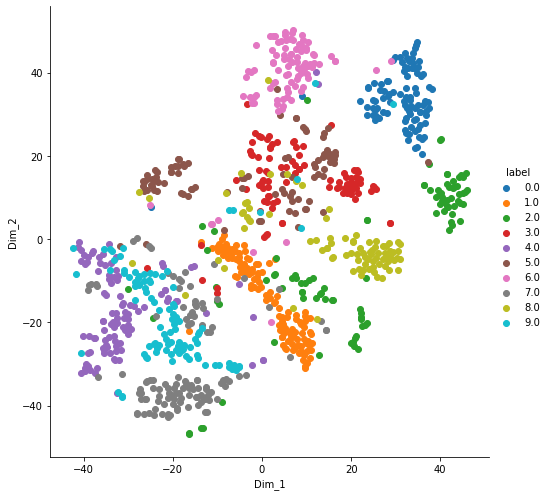

In [0]:
from sklearn.manifold import TSNE

#data_1000 = test_img[:1000]
labels_1000 = Y_train[:1000]
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(x1)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
g=sn.FacetGrid(tsne_df, hue='label', height=7).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
#plt.savefig('tsne_default.png')


In [0]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
X_train.shape

(60000, 784)

In [0]:
Y_train.shape

(60000,)

Plotting PCA for first 1000 samples

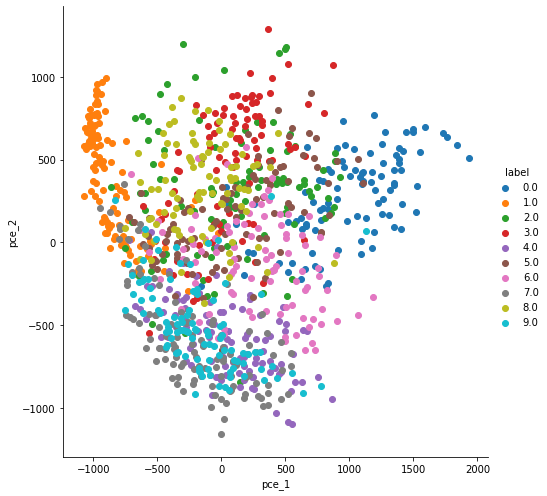

<Figure size 432x288 with 0 Axes>

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_1000 = x1[0:1000,:]
labels_1000 = Y_train[0:1000]
X_transformed = pca.fit_transform(x1[0:1000,:])
pce_data = np.vstack((X_transformed.T, labels_1000)).T
pce_df = pd.DataFrame(data=pce_data, columns=('pce_1', 'pce_2', 'label'))
sn.FacetGrid(pce_df, hue='label', height=7).map(plt.scatter, 'pce_1', 'pce_2').add_legend()
plt.show()
plt.savefig('tsne_default.png')

Defining a model and training it over 60000 samples

In [0]:
#X_train = tf.keras.utils.normalize(X_train)
#X_test = tf.keras.utils.normalize(X_test)

model = Sequential()
model.add(Dense(1024,activation=tf.nn.relu,kernel_initializer='glorot_normal',input_shape=(784,)))
model.add(Dense(1024,activation=tf.nn.relu))
model.add(Dense(1024,activation=tf.nn.relu))
model.add(Dense(1024,activation=tf.nn.relu))
model.add(Dense(1024,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,Y_train,epochs = 20,batch_size=100)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 5,012,490
Trainable params: 5,012,490
Non-trainable params: 0
________________________________________

Evaluating the model and checking the test accuracy

In [0]:
val_loss,val_acc = model.evaluate(X_test,Y_test)
y_pred = model.predict(X_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 44us/step
0.1182755252655421 0.9795


In [0]:
X_test.shape

(10000, 784)

Taking 10 indexes of the first 10 outputs for each digit prediction

In [0]:
y_pred[0]

array([3.1183354e-21, 3.2714418e-14, 1.1844754e-15, 3.5518117e-19,
       5.4299206e-16, 4.3537820e-18, 5.1219852e-28, 1.0000000e+00,
       3.2859055e-18, 1.6397894e-15], dtype=float32)

In [0]:
A=np.argmax(y_pred,axis=1)
p=[]
l = 0
while l<10:
  i = 0
  for j,k in enumerate(A):
    if k==l and i<10:
      p.append(j)
      i+=1
  l=l+1
#print(p)
#print(len(p))

In [0]:
A

array([7, 2, 1, ..., 4, 5, 6])

Plotting the input of the above mentioned predictions of the output layer

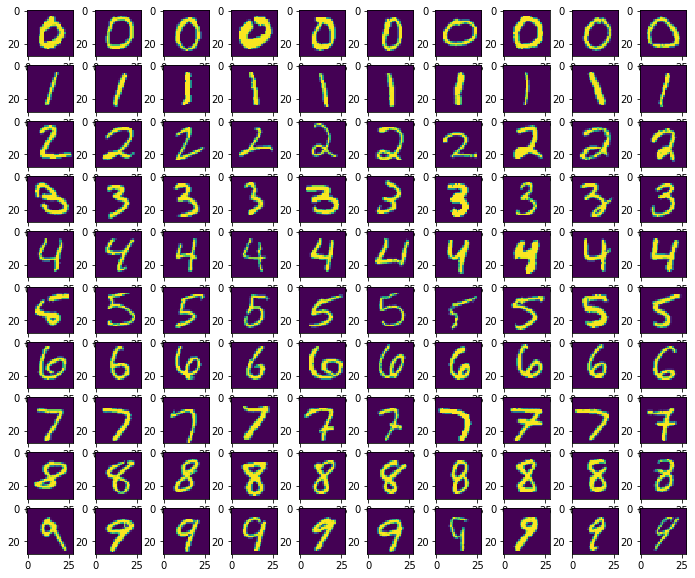

In [0]:
%matplotlib inline
# preview the images first

plt.figure(figsize=(12,10))
x, y = 10, 10
id1=p
for i in range(100):  
    plt.subplot(y, x,i+1)
    plt.imshow(X_test[id1[i]].reshape((28,28)),interpolation='nearest')        
plt.show()

Naming Each layer

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(X_train[:1000])

first_layer_activation = activations[0]
second_layer_activation = activations[1]
third_layer_activation= activations[2]
fourth_layer_activation = activations[3]

#print(first_layer_activation.shape)
#print(first_layer_activation)
#print(np.amax(first_layer_activation))
#print(first_layer_activation.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("de..., outputs=[<tf.Tenso...)`
  after removing the cwd from sys.path.


In [0]:
print((first_layer_activation.shape))
from sklearn.feature_extraction.text import TfidfVectorizer

(1000, 1024)


In [0]:
import tensorflow as tf
import numpy as np
s, u, v = tf.linalg.svd(first_layer_activation)
tf_a_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))
u, s, v_adj = np.linalg.svd(first_layer_activation, full_matrices=False)
np_a_approx = np.dot(u, np.dot(np.diag(s), v_adj))

In [0]:
print(tf_a_approx)

Tensor("strided_slice:0", shape=(1024,), dtype=float32)


Selecting random indexes from the last but one activation layer

In [0]:
k=np.random.choice(fourth_layer_activation.shape[1],10,replace=False)
ac=fourth_layer_activation[:,k]

selecting and plotting the inputs of radnom activations selected from the last but one activation layer

In [0]:
A=np.argmax(ac,axis=1)
O=[]
l = 0
while l<10:
  i = 0
  for j,k in enumerate(A):
    if k==l and i<10:
      O.append(j)
      i+=1
  l=l+1
print(O)
print(len(O))

[1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 29, 71, 79, 91, 101, 141, 158, 185, 193, 196, 161, 268, 472, 646, 664, 688, 862, 5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 0, 11, 35, 47, 65, 100, 132, 138, 145, 173]
47


IndexError: ignored

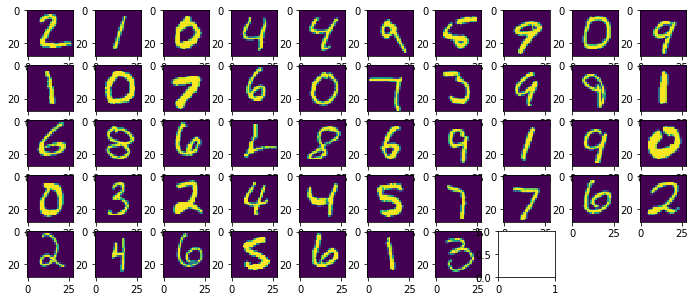

In [0]:
%matplotlib inline
# preview the images first

plt.figure(figsize=(12,10))
x, y = 10, 10
id2=O
for i in range(100):  
    plt.subplot(y, x,i+1)
    plt.imshow(X_test[O[i]].reshape((28,28)),interpolation='nearest')        
plt.show()

While plotting the outs of the second to the last layer we can observe the predictions are not perfect but random compare the outs of the last layer

Applying PCA for each layer of activation

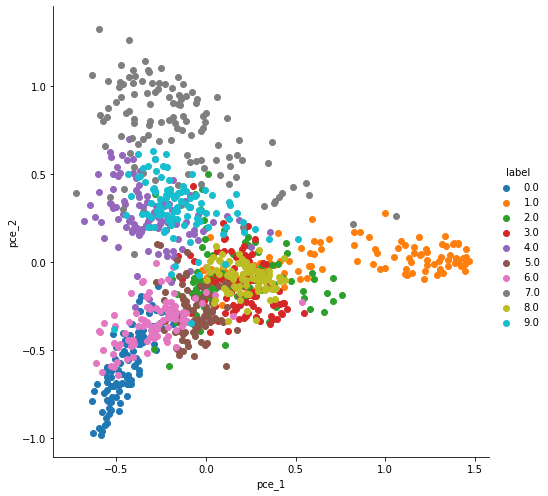

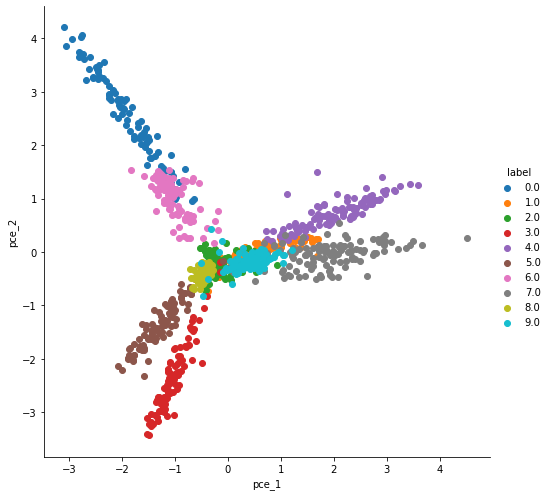

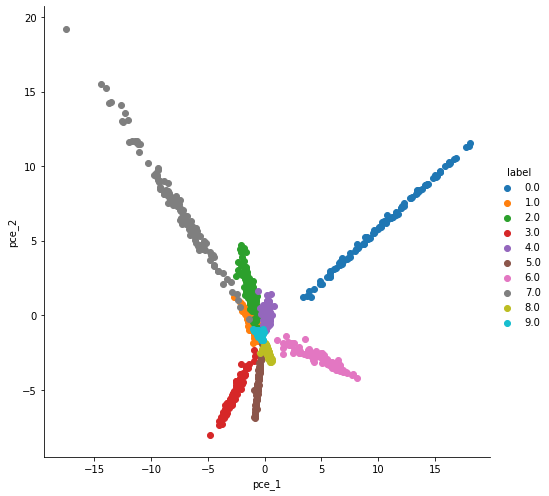

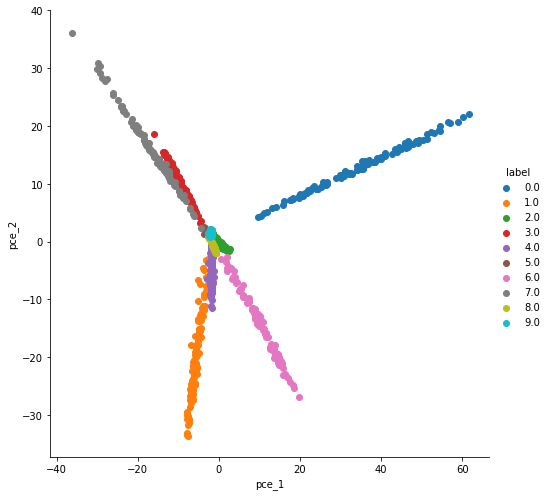

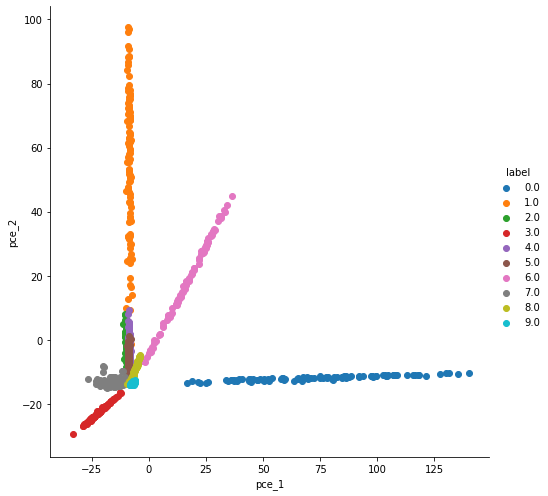

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
i=0
while i<5:
  data_1000 = activations[i]
  labels_1000 = Y_train[0:1000]
  X_transformed = pca.fit_transform(data_1000[0:1000,:])
  pce_data = np.vstack((X_transformed.T, labels_1000)).T
  pce_df = pd.DataFrame(data=pce_data, columns=('pce_1', 'pce_2', 'label'))
  #pce_df.plot(kind='scatter',x='pce_1',y='pce_2',hue='label')
  g=sn.FacetGrid(pce_df, hue='label', height=7).map(plt.scatter, 'pce_1', 'pce_2').add_legend()
  plt.show()
  i=i+1

Applying tSNE for each layer of activation 

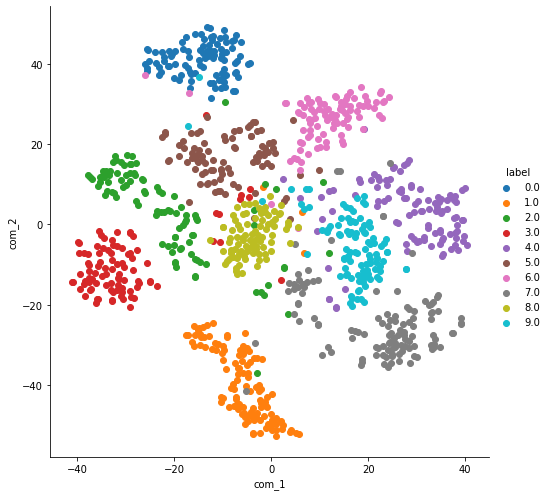

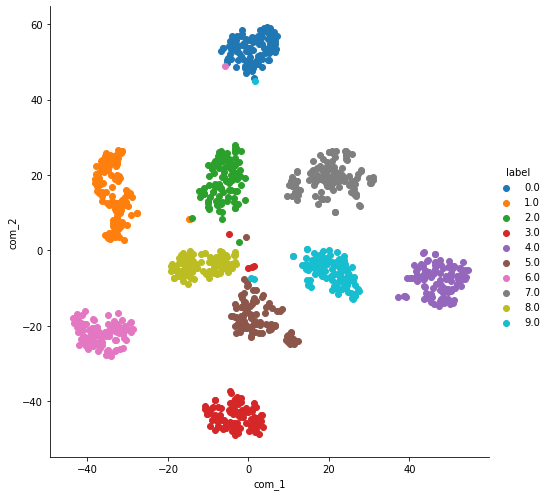

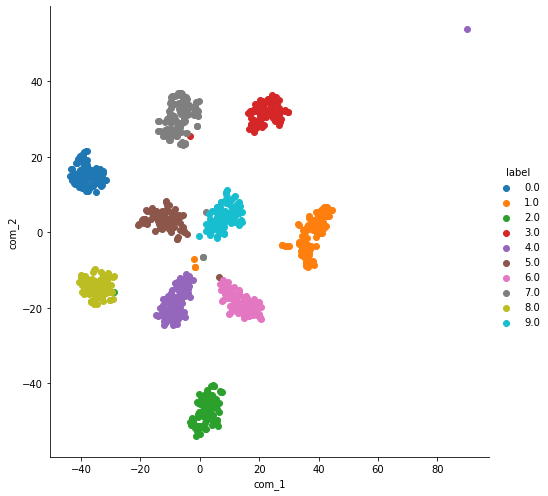

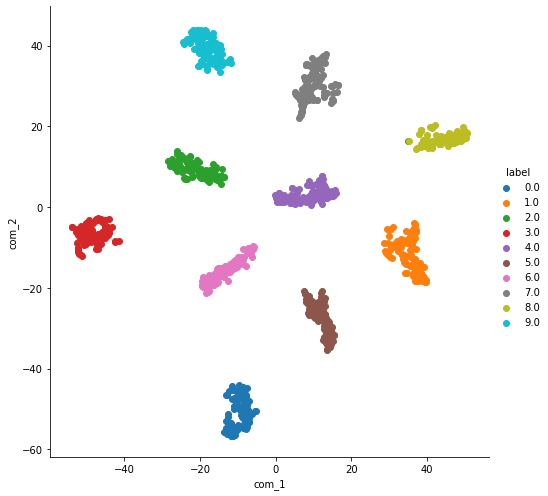

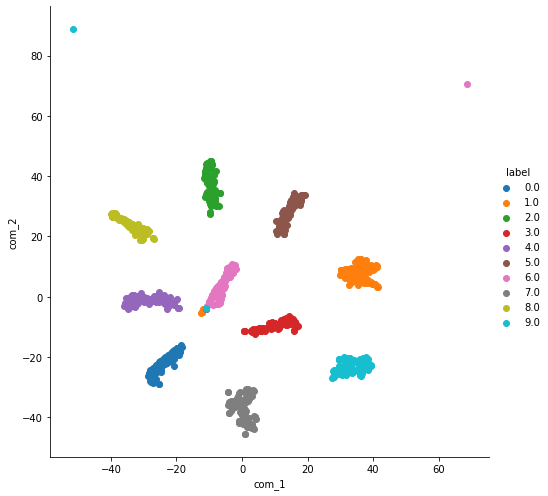

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
j=0
while j<5:
  data_1000 = activations[j]
  scaler = StandardScaler()
  scaler.fit(data_1000)
  train_imge = scaler.transform(data_1000)
  labels_1000 = Y_train[0:1000]
  model = TSNE(n_components=2)
  tsne_data = model.fit_transform(train_imge[0:1000,:])
  tsne_data = np.vstack((tsne_data.T, labels_1000)).T
  tsne_df = pd.DataFrame(data=tsne_data, columns=('com_1', 'com_2', 'label'))
  sn.FacetGrid(tsne_df, hue='label', height=7).map(plt.scatter, 'com_1', 'com_2').add_legend()
  plt.show()
  j=j+1

tSNE gives a better clustering compared to the PCA graphs